## 1. Visualising images and their respective captions.

In [49]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from textwrap import wrap

In [ ]:
# img_dir = "lab1_MSCOCO/MS-COCO/val2017/"
imageDir = 'MS-COCO/val2017/'
ann_file = "/home/BTECH_7TH_SEM/Documents/MML/lab1_MSCOCO/MS-COCO/annotations_trainval2017/annotations/captions_val2017.json"

In [41]:
coco_cap = COCO("/home/BTECH_7TH_SEM/Documents/MML/lab1_MSCOCO/MS-COCO/annotations_trainval2017/annotations/captions_val2017.json")
# coco_captions = COCO(ann_file)

img_ids = coco_cap.getImgIds()

print(f"Total number of images: {len(img_ids)}")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Total number of images: 5000


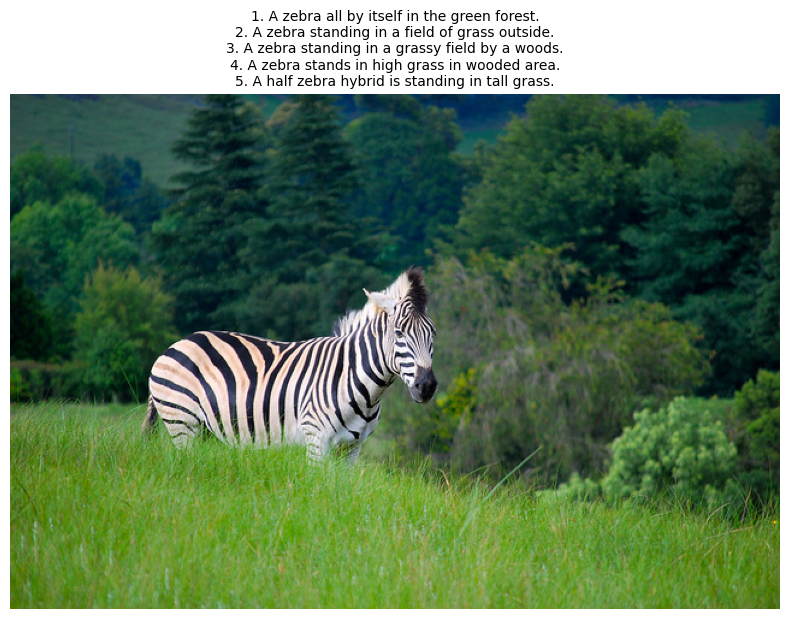

In [ ]:
from textwrap import wrap

id = int(input("Enter index to view image: "))

image_ids = coco_cap.getImgIds()
image_id = image_ids[id]
image_info = coco_cap.loadImgs(image_id)[0]

ann_ids = coco_cap.getAnnIds(imgIds=[image_id])
anns = coco_cap.loadAnns(ann_ids)

image_path = image_info['file_name']
image = plt.imread(imageDir + image_path)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')

if anns:
    all_caps = [f"{i+1}. {c['caption']}" for i, c in enumerate(anns)]
    # wrap long lines for readability
    wrapped = "\n".join(["\n".join(wrap(c, 60)) for c in all_caps])
    plt.title(wrapped, fontsize=10, loc='center')
else:
    plt.title("No captions found", fontsize=12)

plt.tight_layout()
plt.show()


2. Preprocess text (tokenization) and images (resizing, normalization)